In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('experiment_data_2_wks.txt', parse_dates=['treatment_date', 'signup_date'])

In [3]:
df.head()

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaT
1,2016-04-01,0,0,NaT
2,2016-04-01,0,0,NaT
3,2016-04-01,0,0,NaT
4,2016-04-01,0,0,NaT


treatment date:  the date of the email being sent  
test:  if the email was in test or control group  
is signed up:  if the user is signed up  
signup date:  when the user signed up  

#### How large is each group?
By group I believe they mean test groups.  About 30k in the control group and 3.3k in the test group.  As expected, there are about 10% in the test group.

In [4]:
df['test'].value_counts()

0    30241
1     3372
Name: test, dtype: int64

In [5]:
df[df['test']==1].shape[0]/df.shape[0]

0.10031832921786214

#### What is the signup rate of test and control groups?

In [6]:
control_signedup = df[(df['test']==0) & (df['is_signed_up']==1)]
test_signedup = df[(df['test']==1) & (df['is_signed_up']==1)]

In [7]:
print('Signup rate for control group: {}'.format(control_signedup.shape[0]/df[df['test']==0].shape[0]*100))

Signup rate for control group: 14.708508316523924


In [8]:
print('Signup rate for test group: {}'.format(test_signedup.shape[0]/df[df['test']==1].shape[0]*100))

Signup rate for test group: 13.701067615658364


Note the signup rates for the test groups is actually lower than the control.

#### Is the experiment already significant?
To find out, perform a t-test and set p-value to 0.05.  The null hypothesis is that the new email campaign resulted in more people signing up for the service.  The alternative is that the email campaign made no difference in signup rates.  

In [9]:
sample_control_signedup = np.random.choice(df[(df['test']==0)]['is_signed_up'], size = 500, replace = True)
sample_test_signedup = np.random.choice(df[(df['test']==1)]['is_signed_up'], size = 500, replace = False)

In [10]:
print(ttest_ind(sample_control_signedup, sample_test_signedup, equal_var=False))

Ttest_indResult(statistic=-0.37334364178372648, pvalue=0.70897203837167422)


The t-test has a value of 1.62, but the p-value is 0.11, greater than 0.05.  Thus, we reject the null hypothesis and there conclude that for the first 2 weeks, there is no difference between the control and test groups.

#### Why would the test signup rate be lower than the control signup rate?
Look at secondary metric, the time between receiving the email to the signup date.  

In [11]:
def time_to_signup(cols):
#     print(cols[0], cols[1])
    return (cols[1] - cols[0]).days

In [12]:
df[(df['is_signed_up']) & (df['signup_date'].notnull())][['treatment_date', 'signup_date']].head()

,treatment_date,signup_date
6,2016-04-01,2016-04-02
29,2016-04-01,2016-04-02
35,2016-04-01,2016-04-03
36,2016-04-01,2016-04-05
37,2016-04-01,2016-04-05


In [14]:
df['time_elapsed'] = df[(df['is_signed_up']) & (df['signup_date'].notnull())][['treatment_date', 'signup_date']].apply(time_to_signup, axis = 1)

In [15]:
print('Average signup time for control group: {}'.format(df[df['test']==0]['time_elapsed'].mean()))
print('Average signup time for test group: {}'.format(df[df['test']==1]['time_elapsed'].mean()))

Average signup time for control group: 3.187275179856115
Average signup time for test group: 4.283549783549783


Here we see that it takes on average a full day longer for the test group to sign up, with the control group averaging 3 days to sign up and the test group averaging 4 days.  

Below is a distribution of when people signed up.  It shows a right skew distribution spanning the whole two weeks.  The control group peaked at 2 days whereas the test group peaked at 3 days.

In [78]:
df['days_to_signup'] = (df['signup_date'] - df['treatment_date']).dt.days

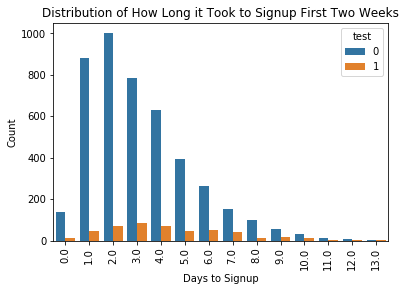

In [80]:
sns.countplot(x = 'days_to_signup', hue = 'test', data = df)
plt.xticks(rotation = 90)
plt.title('Distribution of How Long it Took to Signup First Two Weeks')
plt.xlabel('Days to Signup')
plt.ylabel('Count')

#### Get final dataset
Answer same questions as above.

In [16]:
final = pd.read_csv('experiment_data_final.txt', parse_dates=['treatment_date', 'signup_date'])

#### How large is each group?
There are ~47k in the control group and ~20k in the test group.  Test group now accounts for 30% of campaign emails sent.  But we wanted 50%...

In [17]:
final['test'].value_counts()

0    46867
1    19861
Name: test, dtype: int64

In [18]:
final[final['test']==1].shape[0]/len(final)*100

29.76411701234864

#### What is the signup rate of test and control groups?

In [19]:
print('Signup rate for control group: {}'.format(final[(final['test']==0) & (final['is_signed_up']==1)]
.shape[0]/final[final['test']==0].shape[0]*100))

Signup rate for control group: 19.937269293959503


In [20]:
print('Signup rate for test group: {}'.format(final[(final['test']==1) & (final['is_signed_up']==1)]
.shape[0]/final[final['test']==1].shape[0]*100))

Signup rate for test group: 24.21328231206888


#### Is the experiment already significant?
The null hypothesis is the same as above, that the new email campaign increased the rate of signups.  Here, we see that the p value is below 0.05, so we can accept the null hypothesis and that the new email campaign increase signups.  

In [21]:
sample_control_signedup = np.random.choice(final[(final['test']==0)]['is_signed_up'], size = 1000, replace = True)
sample_test_signedup = np.random.choice(final[(final['test']==1)]['is_signed_up'], size = 1000, replace = False)

In [22]:
print(ttest_ind(sample_control_signedup, sample_test_signedup, equal_var=False))

Ttest_indResult(statistic=-0.70089365064004527, pvalue=0.48345103914405185)


#### Create a visualization to tell the story of the effect of the new email
First, I'd like to look at the time elapsed when the person first receives the email and signs up.  This time, the elapsed time is 4 days for the control group and 6 days for the test group.

In [72]:
final['time_elapsed'] = final[(final['is_signed_up']) & (final['signup_date'].notnull())][['treatment_date', 'signup_date']].apply(time_to_signup, axis = 1)

In [73]:
print('Average signup time for control group: {}'.format(final[final['test']==0]['time_elapsed'].mean()))
print('Average signup time for test group: {}'.format(final[final['test']==1]['time_elapsed'].mean()))

Average signup time for control group: 4.008775684931507
Average signup time for test group: 6.043876065710127


Below is a distribution for how long it took users to sign up.  The plot is similar to the two weeks version, with a heavy right skew and peaks at 2 and 3 days for control and test groups respectively.  But the tail extends for the duration of the testing period (38 day instead of 13), increasing the average by 2-3 days.  **Overall it seems that the new email campaign works, just the signup rate is slower than expected.**   

In [74]:
final['days_to_signup'] = (final['signup_date'] - final['treatment_date']).dt.days

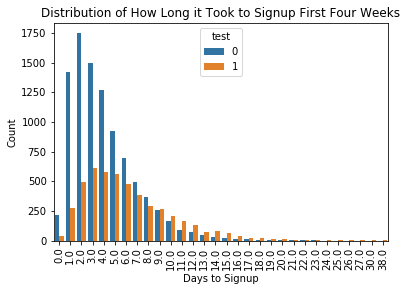

In [81]:
sns.countplot(x = 'days_to_signup', hue = 'test', data = final)
plt.xticks(rotation = 90)
plt.title('Distribution of How Long it Took to Signup First Four Weeks')
plt.xlabel('Days to Signup')
plt.ylabel('Count')